In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import Counter
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demand-forecasting/sample_submission_pzljTaX.csv
/kaggle/input/demand-forecasting/train_0irEZ2H.csv
/kaggle/input/demand-forecasting/test_nfaJ3J5.csv


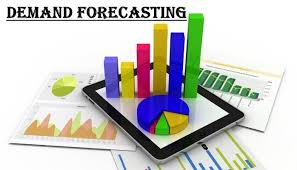

In [3]:
train = pd.read_csv('/kaggle/input/demand-forecasting/train_0irEZ2H.csv') 
test = pd.read_csv('/kaggle/input/demand-forecasting/test_nfaJ3J5.csv')
sample = pd.read_csv('/kaggle/input/demand-forecasting/sample_submission_pzljTaX.csv')

# sku - stock-keeping unit

Change week to date time

In [4]:
train['week'] = pd.to_datetime(train['week'])
test['week'] = pd.to_datetime(test['week'])

# Exploratory data analysis

In [5]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [6]:
test.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [7]:
train.apply(lambda x: len(x.unique()))

record_ID          150150
week                  130
store_id               76
sku_id                 28
total_price           647
base_price            572
is_featured_sku         2
is_display_sku          2
units_sold            708
dtype: int64

In [8]:
test.apply(lambda x: len(x.unique()))

record_ID          13860
week                  12
store_id              76
sku_id                28
total_price          442
base_price           370
is_featured_sku        2
is_display_sku         2
dtype: int64

In [9]:
print(train['is_featured_sku'].value_counts()/train['is_featured_sku'].shape[0])

print(test['is_featured_sku'].value_counts()/test['is_featured_sku'].shape[0])

0    0.904389
1    0.095611
Name: is_featured_sku, dtype: float64
0    0.91342
1    0.08658
Name: is_featured_sku, dtype: float64


In [10]:
print(train['is_display_sku'].value_counts()/train['is_display_sku'].shape[0])

print(test['is_display_sku'].value_counts()/test['is_display_sku'].shape[0])

0    0.8668
1    0.1332
Name: is_display_sku, dtype: float64
0    0.866667
1    0.133333
Name: is_display_sku, dtype: float64


Conclusion - Balanced data set

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  int64         
 3   sku_id           150150 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  int64         
 7   is_display_sku   150150 non-null  int64         
 8   units_sold       150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 10.3 MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   record_ID        13860 non-null  int64         
 1   week             13860 non-null  datetime64[ns]
 2   store_id         13860 non-null  int64         
 3   sku_id           13860 non-null  int64         
 4   total_price      13860 non-null  float64       
 5   base_price       13860 non-null  float64       
 6   is_featured_sku  13860 non-null  int64         
 7   is_display_sku   13860 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 866.4 KB


is_featured_sku and is_display_sku -> Units  = 1

In [13]:
train.columns

Index(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold'],
      dtype='object')

In [14]:
start = []
end = []
ct = 0
for store in list(set(train['store_id'])):
    temp_of_train = train[train['store_id'] == store]
    temp_of_test = test[test['store_id'] == store]
    for sku in list(set(temp_of_train['sku_id'])):
        
        train_df = temp_of_train[temp_of_train['sku_id'] == sku]
        test_df = temp_of_test[temp_of_test['sku_id'] == sku]
        
        train_df.sort_values("week")
        test_df.sort_values("week")
        print(store,sku)
        print(train_df['week'].iloc[-1])
        start.append(train_df['week'].iloc[-1])
        print(test_df['week'].iloc[0])
        end.append(test_df['week'].iloc[0])
        print(test_df)
        
        
        ct+=1

9984 219009
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
1144      214271 2013-07-16      9984  219009     201.6375    201.6375   
2299      215908 2013-07-23      9984  219009     208.0500    208.0500   
3454      217545 2013-07-30      9984  219009     218.7375    218.7375   
4609      219185 2013-06-08      9984  219009     198.7875    218.7375   
5764      220816 2013-08-13      9984  219009     218.0250    218.0250   
6919      222454 2013-08-20      9984  219009     190.2375    218.0250   
8074      224094 2013-08-27      9984  219009     218.7375    218.7375   
9229      225723 2013-03-09      9984  219009     211.6125    211.6125   
10384     227355 2013-10-09      9984  219009     201.6375    201.6375   
11539     228995 2013-09-17      9984  219009     213.7500    213.7500   
12694     230633 2013-09-24      9984  219009     218.7375    218.7375   
13849     232275 2013-01-10      9984  219009     218.7375  

9092 219009
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
367       213154 2013-07-16      9092  219009     187.3875    187.3875   
1522      214794 2013-07-23      9092  219009     188.8125    188.8125   
2677      216430 2013-07-30      9092  219009     190.9500    190.9500   
3832      218069 2013-06-08      9092  219009     190.9500    190.9500   
4987      219705 2013-08-13      9092  219009     178.8375    178.8375   
6142      221338 2013-08-20      9092  219009     190.9500    190.9500   
7297      222978 2013-08-27      9092  219009     190.9500    190.9500   
8452      224615 2013-03-09      9092  219009     184.5375    184.5375   
9607      226246 2013-10-09      9092  219009     179.5500    179.5500   
10762     227879 2013-09-17      9092  219009     190.9500    190.9500   
11917     229518 2013-09-24      9092  219009     185.9625    185.9625   
13072     231158 2013-01-10      9092  219009     183.8250  

9221 223153
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
477       213317 2013-07-16      9221  223153     235.8375    235.8375   
1632      214956 2013-07-23      9221  223153     141.7875    235.8375   
2787      216593 2013-07-30      9221  223153     141.7875    235.8375   
3942      218231 2013-06-08      9221  223153     235.8375    235.8375   
5097      219867 2013-08-13      9221  223153     235.8375    235.8375   
6252      221501 2013-08-20      9221  223153     235.8375    235.8375   
7407      223141 2013-08-27      9221  223153     235.8375    235.8375   
8562      224774 2013-03-09      9221  223153     235.8375    235.8375   
9717      226408 2013-10-09      9221  223153     235.8375    235.8375   
10872     228042 2013-09-17      9221  223153     238.6875    238.6875   
12027     229681 2013-09-24      9221  223153     240.8250    240.8250   
13182     231320 2013-01-10      9221  223153     240.8250  

9481 222087
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
703       213627 2013-07-16      9481  222087     161.0250    211.6125   
1858      215266 2013-07-23      9481  222087     195.9375    195.9375   
3013      216904 2013-07-30      9481  222087     227.2875    227.2875   
4168      218542 2013-06-08      9481  222087     227.2875    227.2875   
5323      220175 2013-08-13      9481  222087     143.2125    227.2875   
6478      221811 2013-08-20      9481  222087     142.5000    227.2875   
7633      223451 2013-08-27      9481  222087     171.7125    227.2875   
8788      225081 2013-03-09      9481  222087     189.5250    227.2875   
9943      226717 2013-10-09      9481  222087     187.3875    227.2875   
11098     228350 2013-09-17      9481  222087     216.6000    216.6000   
12253     229992 2013-09-24      9481  222087     194.5125    194.5125   
13408     231630 2013-01-10      9481  222087     222.3000  

9613 398721
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
810       213788 2013-07-16      9613  398721     355.5375    469.5375   
1965      215427 2013-07-23      9613  398721     469.5375    469.5375   
3120      217063 2013-07-30      9613  398721     469.5375    469.5375   
4275      218703 2013-06-08      9613  398721     401.8500    469.5375   
5430      220335 2013-08-13      9613  398721     401.8500    469.5375   
6585      221970 2013-08-20      9613  398721     401.8500    469.5375   
7740      223611 2013-08-27      9613  398721     401.8500    469.5375   
8895      225241 2013-03-09      9613  398721     401.8500    469.5375   
10050     226874 2013-10-09      9613  398721     401.8500    469.5375   
11205     228511 2013-09-17      9613  398721     401.8500    469.5375   
12360     230153 2013-09-24      9613  398721     335.5875    469.5375   
13515     231791 2013-01-10      9613  398721     339.8625  

9872 223153
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
1013      214086 2013-07-16      9872  223153     197.3625    197.3625   
2168      215724 2013-07-23      9872  223153     141.7875    197.3625   
3323      217360 2013-07-30      9872  223153     142.5000    197.3625   
4478      219000 2013-06-08      9872  223153     212.3250    212.3250   
5633      220632 2013-08-13      9872  223153     212.3250    212.3250   
6788      222269 2013-08-20      9872  223153     212.3250    212.3250   
7943      223909 2013-08-27      9872  223153     212.3250    212.3250   
9098      225538 2013-03-09      9872  223153     212.3250    212.3250   
10253     227170 2013-10-09      9872  223153     212.3250    212.3250   
11408     228810 2013-09-17      9872  223153     212.3250    212.3250   
12563     230449 2013-09-24      9872  223153     212.3250    212.3250   
13718     232090 2013-01-10      9872  223153     212.3250  

9490 300021
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
709       213641 2013-07-16      9490  300021      89.0625     89.0625   
1864      215280 2013-07-23      9490  300021      79.8000     89.0625   
3019      216916 2013-07-30      9490  300021      70.5375     89.0625   
4174      218556 2013-06-08      9490  300021      71.2500     89.0625   
5329      220189 2013-08-13      9490  300021      69.8250     89.0625   
6484      221825 2013-08-20      9490  300021      89.0625     89.0625   
7639      223465 2013-08-27      9490  300021      89.0625     89.0625   
8794      225095 2013-03-09      9490  300021      89.0625     89.0625   
9949      226731 2013-10-09      9490  300021      88.3500     88.3500   
11104     228364 2013-09-17      9490  300021      89.0625     89.0625   
12259     230006 2013-09-24      9490  300021      86.2125     86.2125   
13414     231644 2013-01-10      9490  300021      87.6375  

9112 219009
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
387       213180 2013-07-16      9112  219009     207.3375    207.3375   
1542      214819 2013-07-23      9112  219009     214.4625    214.4625   
2697      216456 2013-07-30      9112  219009     216.6000    216.6000   
3852      218095 2013-06-08      9112  219009     212.3250    216.6000   
5007      219731 2013-08-13      9112  219009     193.0875    216.6000   
6162      221364 2013-08-20      9112  219009     188.8125    216.6000   
7317      223004 2013-08-27      9112  219009     198.7875    198.7875   
8472      224640 2013-03-09      9112  219009     207.3375    207.3375   
9627      226272 2013-10-09      9112  219009     213.0375    213.0375   
10782     227905 2013-09-17      9112  219009     213.0375    213.0375   
11937     229544 2013-09-24      9112  219009     207.3375    207.3375   
13092     231183 2013-01-10      9112  219009     206.6250  

9880 320485
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
1054      214142 2013-07-16      9880  320485     227.2875    227.2875   
2209      215779 2013-07-23      9880  320485     234.4125    234.4125   
3364      217416 2013-07-30      9880  320485     234.4125    234.4125   
4519      219056 2013-06-08      9880  320485     234.4125    234.4125   
5674      220688 2013-08-13      9880  320485     234.4125    234.4125   
6829      222325 2013-08-20      9880  320485     234.4125    234.4125   
7984      223965 2013-08-27      9880  320485     234.4125    234.4125   
9139      225594 2013-03-09      9880  320485     234.4125    234.4125   
10294     227226 2013-10-09      9880  320485     234.4125    234.4125   
11449     228866 2013-09-17      9880  320485     234.4125    234.4125   
12604     230505 2013-09-24      9880  320485     234.4125    234.4125   
13759     232146 2013-01-10      9880  320485     234.4125  

       record_ID       week  store_id  sku_id  total_price  base_price  \
568       213435 2013-07-16      9371  216418      109.725     109.725   
1723      215075 2013-07-23      9371  216418      108.300     108.300   
2878      216712 2013-07-30      9371  216418      109.725     108.300   
4033      218350 2013-06-08      9371  216418      109.725     109.725   
5188      219986 2013-08-13      9371  216418      109.725     109.725   
6343      221620 2013-08-20      9371  216418      109.725     109.725   
7498      223259 2013-08-27      9371  216418      112.575     112.575   
8653      224890 2013-03-09      9371  216418      112.575     112.575   
9808      226527 2013-10-09      9371  216418      109.725     112.575   
10963     228159 2013-09-17      9371  216418      109.725     112.575   
12118     229800 2013-09-24      9371  216418      109.725     112.575   
13273     231439 2013-01-10      9371  216418      109.725     109.725   

       is_featured_sku  is_display_sk

8222 217390
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
112       212794 2013-07-16      8222  217390     175.2750    175.2750   
1267      214432 2013-07-23      8222  217390     168.1500    168.1500   
2422      216069 2013-07-30      8222  217390     174.5625    174.5625   
3577      217707 2013-06-08      8222  217390     175.2750    175.2750   
4732      219346 2013-08-13      8222  217390     167.4375    167.4375   
5887      220977 2013-08-20      8222  217390     168.1500    168.1500   
7042      222615 2013-08-27      8222  217390     158.8875    158.8875   
8197      224255 2013-03-09      8222  217390     166.7250    166.7250   
9352      225884 2013-10-09      8222  217390     169.5750    169.5750   
10507     227517 2013-09-17      8222  217390     173.1375    173.1375   
11662     229157 2013-09-24      8222  217390     174.5625    174.5625   
12817     230795 2013-01-10      8222  217390     175.9875  

8094 219029
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
38        212698 2013-07-16      8094  219029     327.0375    327.0375   
1193      214337 2013-07-23      8094  219029     327.0375    327.0375   
2348      215974 2013-07-30      8094  219029     327.0375    327.0375   
3503      217611 2013-06-08      8094  219029     327.0375    327.0375   
4658      219250 2013-08-13      8094  219029     235.8375    327.0375   
5813      220882 2013-08-20      8094  219029     235.1250    327.0375   
6968      222519 2013-08-27      8094  219029     236.5500    327.0375   
8123      224160 2013-03-09      8094  219029     321.3375    321.3375   
9278      225789 2013-10-09      8094  219029     327.0375    327.0375   
10433     227421 2013-09-17      8094  219029     327.0375    327.0375   
11588     229061 2013-09-24      8094  219029     319.9125    319.9125   
12743     230699 2013-01-10      8094  219029     327.0375  

2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
484       213330 2013-07-16      9250  219844     247.9500    369.0750   
1639      214969 2013-07-23      9250  219844     251.5125    369.0750   
2794      216606 2013-07-30      9250  219844     282.1500    369.0750   
3949      218244 2013-06-08      9250  219844     285.0000    285.0000   
5104      219880 2013-08-13      9250  219844     283.5750    283.5750   
6259      221514 2013-08-20      9250  219844     282.1500    282.1500   
7414      223154 2013-08-27      9250  219844     280.7250    280.7250   
8569      224787 2013-03-09      9250  219844     282.8625    282.8625   
9724      226421 2013-10-09      9250  219844     283.5750    283.5750   
10879     228055 2013-09-17      9250  219844     285.0000    285.0000   
12034     229694 2013-09-24      9250  219844     278.5875    278.5875   
13189     231333 2013-01-10      9250  219844     282.8625    282.8625   

       is_feature

9890 219009
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
1083      214184 2013-07-16      9890  219009     214.4625    214.4625   
2238      215821 2013-07-23      9890  219009     204.4875    204.4875   
3393      217458 2013-07-30      9890  219009     218.7375    218.7375   
4548      219098 2013-06-08      9890  219009     211.6125    218.7375   
5703      220730 2013-08-13      9890  219009     194.5125    218.7375   
6858      222367 2013-08-20      9890  219009     190.2375    218.7375   
8013      224007 2013-08-27      9890  219009     203.0625    203.0625   
9168      225636 2013-03-09      9890  219009     209.4750    209.4750   
10323     227268 2013-10-09      9890  219009     182.4000    209.4750   
11478     228908 2013-09-17      9890  219009     211.6125    211.6125   
12633     230547 2013-09-24      9890  219009     199.5000    199.5000   
13788     232188 2013-01-10      9890  219009     218.7375  

8869 219029
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
298       213060 2013-07-16      8869  219029     341.2875    341.2875   
1453      214700 2013-07-23      8869  219029     341.2875    341.2875   
2608      216336 2013-07-30      8869  219029     341.2875    341.2875   
3763      217975 2013-06-08      8869  219029     341.2875    341.2875   
4918      219611 2013-08-13      8869  219029     235.1250    341.2875   
6073      221244 2013-08-20      8869  219029     230.1375    341.2875   
7228      222884 2013-08-27      8869  219029     236.5500    341.2875   
8383      224523 2013-03-09      8869  219029     324.1875    324.1875   
9538      226152 2013-10-09      8869  219029     341.2875    341.2875   
10693     227785 2013-09-17      8869  219029     341.2875    341.2875   
11848     229425 2013-09-24      8869  219029     341.2875    341.2875   
13003     231064 2013-01-10      8869  219029     341.2875  

9881 216419
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
1062      214152 2013-07-16      9881  216419     109.7250     109.725   
2217      215789 2013-07-23      9881  216419     110.4375     109.725   
3372      217426 2013-07-30      9881  216419     109.7250     109.725   
4527      219066 2013-06-08      9881  216419     109.7250     109.725   
5682      220698 2013-08-13      9881  216419     110.4375     109.725   
6837      222335 2013-08-20      9881  216419     109.7250     109.725   
7992      223975 2013-08-27      9881  216419     112.5750     109.725   
9147      225604 2013-03-09      9881  216419     112.5750     109.725   
10302     227236 2013-10-09      9881  216419     109.7250     109.725   
11457     228876 2013-09-17      9881  216419     109.7250     109.725   
12612     230515 2013-09-24      9881  216419     109.0125     109.725   
13767     232156 2013-01-10      9881  216419     109.7250  

9909 223153
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
1101      214207 2013-07-16      9909  223153     227.2875    227.2875   
2256      215844 2013-07-23      9909  223153     159.6000    227.2875   
3411      217481 2013-07-30      9909  223153     158.8875    227.2875   
4566      219121 2013-06-08      9909  223153     232.9875    232.9875   
5721      220753 2013-08-13      9909  223153     240.8250    240.8250   
6876      222390 2013-08-20      9909  223153     240.8250    240.8250   
8031      224030 2013-08-27      9909  223153     240.8250    240.8250   
9186      225659 2013-03-09      9909  223153     240.8250    240.8250   
10341     227291 2013-10-09      9909  223153     240.8250    240.8250   
11496     228931 2013-09-17      9909  223153     240.8250    240.8250   
12651     230570 2013-09-24      9909  223153     240.8250    240.8250   
13806     232211 2013-01-10      9909  223153     240.8250  

9273 219029
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
506       213358 2013-07-16      9273  219029     282.1500    282.1500   
1661      214997 2013-07-23      9273  219029     282.1500    282.1500   
2816      216634 2013-07-30      9273  219029     282.1500    282.1500   
3971      218272 2013-06-08      9273  219029     264.3375    264.3375   
5126      219908 2013-08-13      9273  219029     234.4125    264.3375   
6281      221542 2013-08-20      9273  219029     234.4125    264.3375   
7436      223182 2013-08-27      9273  219029     234.4125    264.3375   
8591      224814 2013-03-09      9273  219029     184.5375    264.3375   
9746      226449 2013-10-09      9273  219029     282.1500    282.1500   
10901     228083 2013-09-17      9273  219029     282.1500    282.1500   
12056     229722 2013-09-24      9273  219029     282.1500    282.1500   
13211     231361 2013-01-10      9273  219029     282.1500  

9789 219009
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
904       213942 2013-07-16      9789  219009     196.6500    196.6500   
2059      215580 2013-07-23      9789  219009     213.7500    213.7500   
3214      217216 2013-07-30      9789  219009     218.7375    218.7375   
4369      218855 2013-06-08      9789  219009     198.7875    218.7375   
5524      220487 2013-08-13      9789  219009     172.4250    218.7375   
6679      222124 2013-08-20      9789  219009     205.9125    205.9125   
7834      223765 2013-08-27      9789  219009     203.7750    203.7750   
8989      225394 2013-03-09      9789  219009     218.7375    218.7375   
10144     227026 2013-10-09      9789  219009     203.7750    203.7750   
11299     228665 2013-09-17      9789  219009     218.7375    218.7375   
12454     230305 2013-09-24      9789  219009     218.7375    218.7375   
13609     231945 2013-01-10      9789  219009     218.7375  

9279 219844
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
523       213377 2013-07-16      9279  219844     235.1250    267.1875   
1678      215016 2013-07-23      9279  219844     230.8500    267.1875   
2833      216653 2013-07-30      9279  219844     262.9125    262.9125   
3988      218291 2013-06-08      9279  219844     262.2000    262.2000   
5143      219927 2013-08-13      9279  219844     265.7625    265.7625   
6298      221561 2013-08-20      9279  219844     268.6125    268.6125   
7453      223201 2013-08-27      9279  219844     265.0500    265.0500   
8608      224832 2013-03-09      9279  219844     265.7625    265.7625   
9763      226468 2013-10-09      9279  219844     266.4750    266.4750   
10918     228101 2013-09-17      9279  219844     262.2000    262.2000   
12073     229741 2013-09-24      9279  219844     266.4750    266.4750   
13228     231380 2013-01-10      9279  219844     259.3500  

9672 219009
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
769       213733 2013-07-16      9672  219009     213.0375    213.0375   
1924      215372 2013-07-23      9672  219009     205.9125    205.9125   
3079      217008 2013-07-30      9672  219009     218.7375    218.7375   
4234      218648 2013-06-08      9672  219009     213.0375    218.7375   
5389      220280 2013-08-13      9672  219009     191.6625    218.7375   
6544      221917 2013-08-20      9672  219009     189.5250    218.7375   
7699      223556 2013-08-27      9672  219009     178.8375    218.7375   
8854      225186 2013-03-09      9672  219009     207.3375    207.3375   
10009     226820 2013-10-09      9672  219009     208.0500    208.0500   
11164     228456 2013-09-17      9672  219009     218.7375    218.7375   
12319     230098 2013-09-24      9672  219009     218.7375    218.7375   
13474     231736 2013-01-10      9672  219009     218.7375  

9164 378934
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
432       213249 2013-07-16      9164  378934     213.0375    213.0375   
1587      214888 2013-07-23      9164  378934     234.4125    234.4125   
2742      216525 2013-07-30      9164  378934     234.4125    234.4125   
3897      218164 2013-06-08      9164  378934     234.4125    234.4125   
5052      219799 2013-08-13      9164  378934     234.4125    234.4125   
6207      221433 2013-08-20      9164  378934     234.4125    234.4125   
7362      223073 2013-08-27      9164  378934     234.4125    234.4125   
8517      224708 2013-03-09      9164  378934     210.9000    234.4125   
9672      226340 2013-10-09      9164  378934     234.4125    234.4125   
10827     227974 2013-09-17      9164  378934     234.4125    234.4125   
11982     229613 2013-09-24      9164  378934     234.4125    234.4125   
13137     231252 2013-01-10      9164  378934     234.4125  

8911 217217
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
334       213103 2013-07-16      8911  217217     228.7125    266.4750   
1489      214743 2013-07-23      8911  217217     232.2750    266.4750   
2644      216379 2013-07-30      8911  217217     268.6125    266.4750   
3799      218018 2013-06-08      8911  217217     260.0625    266.4750   
4954      219654 2013-08-13      8911  217217     245.8125    245.8125   
6109      221287 2013-08-20      8911  217217     265.0500    265.0500   
7264      222927 2013-08-27      8911  217217     254.3625    254.3625   
8419      224566 2013-03-09      8911  217217     258.6375    258.6375   
9574      226195 2013-10-09      8911  217217     255.0750    255.0750   
10729     227828 2013-09-17      8911  217217     262.9125    262.9125   
11884     229468 2013-09-24      8911  217217     254.3625    254.3625   
13039     231107 2013-01-10      8911  217217     250.8000  

       record_ID       week  store_id  sku_id  total_price  base_price  \
222       212949 2013-07-16      8400  222765     254.3625    254.3625   
1377      214590 2013-07-23      8400  222765     246.5250    246.5250   
2532      216226 2013-07-30      8400  222765     276.4500    276.4500   
3687      217864 2013-06-08      8400  222765     277.1625    277.1625   
4842      219502 2013-08-13      8400  222765     277.1625    277.1625   
5997      221135 2013-08-20      8400  222765     277.1625    277.1625   
7152      222773 2013-08-27      8400  222765     277.1625    277.1625   
8307      224412 2013-03-09      8400  222765     277.1625    277.1625   
9462      226041 2013-10-09      8400  222765     277.1625    277.1625   
10617     227674 2013-09-17      8400  222765     277.1625    277.1625   
11772     229315 2013-09-24      8400  222765     277.1625    277.1625   
12927     230953 2013-01-10      8400  222765     277.1625    277.1625   

       is_featured_sku  is_display_sk

       record_ID       week  store_id  sku_id  total_price  base_price  \
830       213819 2013-07-16      9680  216425     134.6625    134.6625   
1985      215458 2013-07-23      9680  216425     116.1375    134.6625   
3140      217094 2013-07-30      9680  216425     116.1375    134.6625   
4295      218734 2013-06-08      9680  216425     110.4375    134.6625   
5450      220366 2013-08-13      9680  216425     118.2750    134.6625   
6605      222001 2013-08-20      9680  216425     112.5750    134.6625   
7760      223642 2013-08-27      9680  216425     114.0000    134.6625   
8915      225272 2013-03-09      9680  216425     128.2500    128.2500   
10070     226904 2013-10-09      9680  216425     114.7125    128.2500   
11225     228542 2013-09-17      9680  216425     128.9625    128.9625   
12380     230184 2013-09-24      9680  216425     119.7000    119.7000   
13535     231822 2013-01-10      9680  216425     116.1375    116.1375   

       is_featured_sku  is_display_sk

13058                0               0  
9043 245338
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
359       213145 2013-07-16      9043  245338     358.3875    469.5375   
1514      214785 2013-07-23      9043  245338     469.5375    469.5375   
2669      216421 2013-07-30      9043  245338     469.5375    469.5375   
3824      218060 2013-06-08      9043  245338     404.7000    469.5375   
4979      219696 2013-08-13      9043  245338     401.8500    469.5375   
6134      221329 2013-08-20      9043  245338     401.8500    469.5375   
7289      222969 2013-08-27      9043  245338     401.8500    469.5375   
8444      224606 2013-03-09      9043  245338     401.8500    469.5375   
9599      226237 2013-10-09      9043  245338     401.8500    469.5375   
10754     227870 2013-09-17      9043  245338     401.8500    469.5375   
11909     229509 2013-09-24      9043  245338     332.7375    469.5375   
13064     231149 20

       record_ID       week  store_id  sku_id  total_price  base_price  \
974       214033 2013-07-16      9809  219029     341.2875    341.2875   
2129      215670 2013-07-23      9809  219029     341.2875    341.2875   
3284      217306 2013-07-30      9809  219029     341.2875    341.2875   
4439      218946 2013-06-08      9809  219029     341.2875    341.2875   
5594      220578 2013-08-13      9809  219029     247.2375    341.2875   
6749      222215 2013-08-20      9809  219029     250.8000    341.2875   
7904      223856 2013-08-27      9809  219029     245.8125    341.2875   
9059      225485 2013-03-09      9809  219029     341.2875    341.2875   
10214     227116 2013-10-09      9809  219029     341.2875    341.2875   
11369     228756 2013-09-17      9809  219029     341.2875    341.2875   
12524     230395 2013-09-24      9809  219029     341.2875    341.2875   
13679     232036 2013-01-10      9809  219029     341.2875    341.2875   

       is_featured_sku  is_display_sk

9430 216419
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
592       213473 2013-07-16      9430  216419     109.7250    109.7250   
1747      215113 2013-07-23      9430  216419     109.7250    109.7250   
2902      216750 2013-07-30      9430  216419     109.7250    109.7250   
4057      218388 2013-06-08      9430  216419     110.4375    110.4375   
5212      220024 2013-08-13      9430  216419     109.7250    109.7250   
6367      221658 2013-08-20      9430  216419     110.4375    110.4375   
7522      223297 2013-08-27      9430  216419     111.8625    111.8625   
8677      224928 2013-03-09      9430  216419     112.5750    112.5750   
9832      226564 2013-10-09      9430  216419     109.7250    109.7250   
10987     228197 2013-09-17      9430  216419     109.7250    109.7250   
12142     229838 2013-09-24      9430  216419     110.4375    110.4375   
13297     231476 2013-01-10      9430  216419     109.7250  

       record_ID       week  store_id  sku_id  total_price  base_price  \
86        212758 2013-07-16      8023  245387     355.5375    469.5375   
1241      214397 2013-07-23      8023  245387     456.7125    456.7125   
2396      216034 2013-07-30      8023  245387     469.5375    469.5375   
3551      217671 2013-06-08      8023  245387     401.8500    469.5375   
4706      219310 2013-08-13      8023  245387     401.8500    469.5375   
5861      220942 2013-08-20      8023  245387     401.8500    469.5375   
7016      222579 2013-08-27      8023  245387     401.8500    469.5375   
8171      224219 2013-03-09      8023  245387     401.8500    469.5375   
9326      225849 2013-10-09      8023  245387     401.8500    469.5375   
10481     227481 2013-09-17      8023  245387     401.8500    469.5375   
11636     229121 2013-09-24      8023  245387     337.7250    469.5375   
12791     230759 2013-01-10      8023  245387     337.7250    469.5375   

       is_featured_sku  is_display_sk

9432 216233
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
635       213536 2013-07-16      9432  216233     132.5250    132.5250   
1790      215175 2013-07-23      9432  216233     116.8500    132.5250   
2945      216813 2013-07-30      9432  216233     110.4375    132.5250   
4100      218451 2013-06-08      9432  216233     114.7125    132.5250   
5255      220086 2013-08-13      9432  216233     113.2875    132.5250   
6410      221721 2013-08-20      9432  216233     116.1375    132.5250   
7565      223360 2013-08-27      9432  216233     114.0000    132.5250   
8720      224991 2013-03-09      9432  216233     123.9750    123.9750   
9875      226627 2013-10-09      9432  216233     132.5250    132.5250   
11030     228259 2013-09-17      9432  216233     130.3875    130.3875   
12185     229901 2013-09-24      9432  216233     126.8250    126.8250   
13340     231539 2013-01-10      9432  216233     115.4250  

9436 219029
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
655       213565 2013-07-16      9436  219029     327.0375    327.0375   
1810      215204 2013-07-23      9436  219029     327.0375    327.0375   
2965      216842 2013-07-30      9436  219029     327.0375    327.0375   
4120      218480 2013-06-08      9436  219029     327.0375    327.0375   
5275      220114 2013-08-13      9436  219029     242.2500    327.0375   
6430      221750 2013-08-20      9436  219029     238.6875    327.0375   
7585      223389 2013-08-27      9436  219029     238.6875    327.0375   
8740      225019 2013-03-09      9436  219029     234.4125    327.0375   
9895      226656 2013-10-09      9436  219029     242.2500    327.0375   
11050     228288 2013-09-17      9436  219029     327.0375    327.0375   
12205     229930 2013-09-24      9436  219029     327.0375    327.0375   
13360     231568 2013-01-10      9436  219029     327.0375  

9823 245338
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
948       213999 2013-07-16      9823  245338     358.3875    469.5375   
2103      215636 2013-07-23      9823  245338     465.2625    465.2625   
3258      217272 2013-07-30      9823  245338     469.5375    469.5375   
4413      218912 2013-06-08      9823  245338     401.8500    469.5375   
5568      220544 2013-08-13      9823  245338     401.8500    469.5375   
6723      222181 2013-08-20      9823  245338     401.8500    469.5375   
7878      223822 2013-08-27      9823  245338     401.8500    469.5375   
9033      225451 2013-03-09      9823  245338     401.8500    469.5375   
10188     227082 2013-10-09      9823  245338     401.8500    469.5375   
11343     228722 2013-09-17      9823  245338     401.8500    469.5375   
12498     230361 2013-09-24      9823  245338     344.8500    469.5375   
13653     232002 2013-01-10      9823  245338     349.8375  

9954 216233
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
1106      214216 2013-07-16      9954  216233     126.1125    126.1125   
2261      215853 2013-07-23      9954  216233     112.5750    126.1125   
3416      217490 2013-07-30      9954  216233     113.2875    126.1125   
4571      219130 2013-06-08      9954  216233     116.8500    116.8500   
5726      220762 2013-08-13      9954  216233     116.8500    116.8500   
6881      222399 2013-08-20      9954  216233     114.7125    114.7125   
8036      224039 2013-08-27      9954  216233     116.8500    116.8500   
9191      225668 2013-03-09      9954  216233     125.4000    125.4000   
10346     227300 2013-10-09      9954  216233     123.2625    123.2625   
11501     228940 2013-09-17      9954  216233     126.1125    126.1125   
12656     230578 2013-09-24      9954  216233     126.8250    126.8250   
13811     232220 2013-01-10      9954  216233     114.0000  

       record_ID       week  store_id  sku_id  total_price  base_price  \
238       212971 2013-07-16      8422  223153     212.3250    212.3250   
1393      214612 2013-07-23      8422  223153     143.9250    212.3250   
2548      216248 2013-07-30      8422  223153     141.7875    212.3250   
3703      217886 2013-06-08      8422  223153     207.3375    207.3375   
4858      219524 2013-08-13      8422  223153     212.3250    212.3250   
6013      221156 2013-08-20      8422  223153     212.3250    212.3250   
7168      222795 2013-08-27      8422  223153     212.3250    212.3250   
8323      224434 2013-03-09      8422  223153     212.3250    212.3250   
9478      226063 2013-10-09      8422  223153     212.3250    212.3250   
10633     227696 2013-09-17      8422  223153     212.3250    212.3250   
11788     229337 2013-09-24      8422  223153     212.3250    212.3250   
12943     230975 2013-01-10      8422  223153     212.3250    212.3250   

       is_featured_sku  is_display_sk

9961 320485
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
1130      214248 2013-07-16      9961  320485     213.0375    213.0375   
2285      215885 2013-07-23      9961  320485     234.4125    234.4125   
3440      217522 2013-07-30      9961  320485     234.4125    234.4125   
4595      219162 2013-06-08      9961  320485     234.4125    234.4125   
5750      220794 2013-08-13      9961  320485     234.4125    234.4125   
6905      222431 2013-08-20      9961  320485     234.4125    234.4125   
8060      224071 2013-08-27      9961  320485     234.4125    234.4125   
9215      225700 2013-03-09      9961  320485     223.0125    223.0125   
10370     227332 2013-10-09      9961  320485     234.4125    234.4125   
11525     228972 2013-09-17      9961  320485     234.4125    234.4125   
12680     230610 2013-09-24      9961  320485     234.4125    234.4125   
13835     232252 2013-01-10      9961  320485     234.4125  

8555 219009
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
266       213011 2013-07-16      8555  219009     187.3875    187.3875   
1421      214651 2013-07-23      8555  219009     190.2375    190.2375   
2576      216287 2013-07-30      8555  219009     190.9500    190.9500   
3731      217926 2013-06-08      8555  219009     190.9500    190.9500   
4886      219564 2013-08-13      8555  219009     185.2500    190.9500   
6041      221196 2013-08-20      8555  219009     182.4000    190.9500   
7196      222835 2013-08-27      8555  219009     190.9500    190.9500   
8351      224474 2013-03-09      8555  219009     190.9500    190.9500   
9506      226103 2013-10-09      8555  219009     190.9500    190.9500   
10661     227736 2013-09-17      8555  219009     190.9500    190.9500   
11816     229376 2013-09-24      8555  219009     181.6875    181.6875   
12971     231015 2013-01-10      8555  219009     190.9500  

9328 217217
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
555       213418 2013-07-16      9328  217217     231.5625    257.9250   
1710      215058 2013-07-23      9328  217217     235.8375    257.9250   
2865      216695 2013-07-30      9328  217217     265.7625    265.7625   
4020      218333 2013-06-08      9328  217217     270.0375    270.0375   
5175      219969 2013-08-13      9328  217217     250.8000    250.8000   
6330      221603 2013-08-20      9328  217217     270.0375    270.0375   
7485      223242 2013-08-27      9328  217217     260.7750    260.7750   
8640      224873 2013-03-09      9328  217217     270.0375    270.0375   
9795      226510 2013-10-09      9328  217217     261.4875    261.4875   
10950     228142 2013-09-17      9328  217217     270.0375    270.0375   
12105     229783 2013-09-24      9328  217217     266.4750    266.4750   
13260     231422 2013-01-10      9328  217217     267.9000  

9456 223153
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
673       213588 2013-07-16      9456  223153     212.3250     212.325   
1828      215227 2013-07-23      9456  223153     143.2125     212.325   
2983      216865 2013-07-30      9456  223153     143.9250     212.325   
4138      218503 2013-06-08      9456  223153     209.4750     209.475   
5293      220136 2013-08-13      9456  223153     212.3250     212.325   
6448      221772 2013-08-20      9456  223153     212.3250     212.325   
7603      223412 2013-08-27      9456  223153     212.3250     212.325   
8758      225042 2013-03-09      9456  223153     212.3250     212.325   
9913      226678 2013-10-09      9456  223153     212.3250     212.325   
11068     228311 2013-09-17      9456  223153     212.3250     212.325   
12223     229953 2013-09-24      9456  223153     212.3250     212.325   
13378     231591 2013-01-10      9456  223153     212.3250  

       record_ID       week  store_id  sku_id  total_price  base_price  \
847       213849 2013-07-16      9713  216419     110.4375    110.4375   
2002      215488 2013-07-23      9713  216419     109.7250    109.7250   
3157      217124 2013-07-30      9713  216419     109.7250    109.7250   
4312      218764 2013-06-08      9713  216419     109.7250    109.7250   
5467      220396 2013-08-13      9713  216419     109.7250    109.7250   
6622      222031 2013-08-20      9713  216419     110.4375    110.4375   
7777      223672 2013-08-27      9713  216419     112.5750    112.5750   
8932      225301 2013-03-09      9713  216419     113.2875    113.2875   
10087     226934 2013-10-09      9713  216419     109.7250    109.7250   
11242     228572 2013-09-17      9713  216419     110.4375    110.4375   
12397     230214 2013-09-24      9713  216419     109.7250    109.7250   
13552     231852 2013-01-10      9713  216419     110.4375    110.4375   

       is_featured_sku  is_display_sk

9845 217217
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
986       214051 2013-07-16      9845  217217     245.1000    245.1000   
2141      215688 2013-07-23      9845  217217     245.1000    245.1000   
3296      217324 2013-07-30      9845  217217     285.0000    285.0000   
4451      218964 2013-06-08      9845  217217     280.7250    280.7250   
5606      220596 2013-08-13      9845  217217     281.4375    281.4375   
6761      222233 2013-08-20      9845  217217     285.0000    285.0000   
7916      223874 2013-08-27      9845  217217     282.8625    282.8625   
9071      225503 2013-03-09      9845  217217     282.8625    282.8625   
10226     227134 2013-10-09      9845  217217     287.8500    287.8500   
11381     228774 2013-09-17      9845  217217     285.0000    285.0000   
12536     230413 2013-09-24      9845  217217     281.4375    281.4375   
13691     232054 2013-01-10      9845  217217     282.1500  

13701                0               0  
8438 217217
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
247       212984 2013-07-16      8438  217217     231.5625    267.9000   
1402      214625 2013-07-23      8438  217217     234.4125    267.9000   
2557      216261 2013-07-30      8438  217217     262.9125    262.9125   
3712      217899 2013-06-08      8438  217217     257.2125    257.2125   
4867      219537 2013-08-13      8438  217217     267.1875    267.1875   
6022      221169 2013-08-20      8438  217217     267.1875    267.1875   
7177      222808 2013-08-27      8438  217217     264.3375    264.3375   
8332      224447 2013-03-09      8438  217217     264.3375    264.3375   
9487      226076 2013-10-09      8438  217217     267.1875    267.1875   
10642     227709 2013-09-17      8438  217217     258.6375    258.6375   
11797     229350 2013-09-24      8438  217217     266.4750    266.4750   
12952     230988 20

       record_ID       week  store_id  sku_id  total_price  base_price  \
253       212990 2013-07-16      8438  320485     228.0000    228.0000   
1408      214631 2013-07-23      8438  320485     234.4125    234.4125   
2563      216267 2013-07-30      8438  320485     234.4125    234.4125   
3718      217905 2013-06-08      8438  320485     234.4125    234.4125   
4873      219543 2013-08-13      8438  320485     234.4125    234.4125   
6028      221175 2013-08-20      8438  320485     219.4500    219.4500   
7183      222814 2013-08-27      8438  320485     234.4125    234.4125   
8338      224453 2013-03-09      8438  320485     234.4125    234.4125   
9493      226082 2013-10-09      8438  320485     234.4125    234.4125   
10648     227715 2013-09-17      8438  320485     234.4125    234.4125   
11803     229356 2013-09-24      8438  320485     234.4125    234.4125   
12958     230994 2013-01-10      8438  320485     234.4125    234.4125   

       is_featured_sku  is_display_sk

8063 378934
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
61        212725 2013-07-16      8063  378934     205.9125    205.9125   
1216      214364 2013-07-23      8063  378934     234.4125    234.4125   
2371      216001 2013-07-30      8063  378934     234.4125    234.4125   
3526      217638 2013-06-08      8063  378934     234.4125    234.4125   
4681      219277 2013-08-13      8063  378934     187.3875    234.4125   
5836      220909 2013-08-20      8063  378934     234.4125    234.4125   
6991      222546 2013-08-27      8063  378934     234.4125    234.4125   
8146      224187 2013-03-09      8063  378934     234.4125    234.4125   
9301      225816 2013-10-09      8063  378934     234.4125    234.4125   
10456     227448 2013-09-17      8063  378934     234.4125    234.4125   
11611     229088 2013-09-24      8063  378934     234.4125    234.4125   
12766     230726 2013-01-10      8063  378934     234.4125  

       record_ID       week  store_id  sku_id  total_price  base_price  \
92        212765 2013-07-16      8058  216419     109.7250    109.0125   
1247      214404 2013-07-23      8058  216419     110.4375    109.0125   
2402      216041 2013-07-30      8058  216419     109.0125    109.0125   
3557      217678 2013-06-08      8058  216419     109.7250    109.7250   
4712      219317 2013-08-13      8058  216419     109.7250    109.7250   
5867      220949 2013-08-20      8058  216419     110.4375    109.7250   
7022      222586 2013-08-27      8058  216419     112.5750    109.7250   
8177      224226 2013-03-09      8058  216419     109.7250    109.7250   
9332      225856 2013-10-09      8058  216419     109.7250    109.7250   
10487     227488 2013-09-17      8058  216419     109.0125    109.7250   
11642     229128 2013-09-24      8058  216419     109.7250    109.7250   
12797     230766 2013-01-10      8058  216419     109.0125    109.0125   

       is_featured_sku  is_display_sk

8058 378934
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
101       212777 2013-07-16      8058  378934     213.0375    213.0375   
1256      214416 2013-07-23      8058  378934     234.4125    234.4125   
2411      216052 2013-07-30      8058  378934     234.4125    234.4125   
3566      217690 2013-06-08      8058  378934     234.4125    234.4125   
4721      219329 2013-08-13      8058  378934     234.4125    234.4125   
5876      220961 2013-08-20      8058  378934     234.4125    234.4125   
7031      222598 2013-08-27      8058  378934     234.4125    234.4125   
8186      224238 2013-03-09      8058  378934     234.4125    234.4125   
9341      225868 2013-10-09      8058  378934     234.4125    234.4125   
10496     227500 2013-09-17      8058  378934     234.4125    234.4125   
11651     229140 2013-09-24      8058  378934     234.4125    234.4125   
12806     230778 2013-01-10      8058  378934     234.4125  

       record_ID       week  store_id  sku_id  total_price  base_price  \
173       212880 2013-07-16      8317  679023     191.6625    234.4125   
1328      214518 2013-07-23      8317  679023     186.6750    234.4125   
2483      216155 2013-07-30      8317  679023     180.2625    234.4125   
3638      217792 2013-06-08      8317  679023     234.4125    234.4125   
4793      219430 2013-08-13      8317  679023     234.4125    234.4125   
5948      221063 2013-08-20      8317  679023     234.4125    234.4125   
7103      222701 2013-08-27      8317  679023     183.1125    234.4125   
8258      224340 2013-03-09      8317  679023     183.1125    234.4125   
9413      225969 2013-10-09      8317  679023     191.6625    234.4125   
10568     227602 2013-09-17      8317  679023     234.4125    234.4125   
11723     229243 2013-09-24      8317  679023     234.4125    234.4125   
12878     230881 2013-01-10      8317  679023     234.4125    234.4125   

       is_featured_sku  is_display_sk

In [15]:
print(Counter(start))
print(Counter(end))

Counter({Timestamp('2013-09-07 00:00:00'): 1155})
Counter({Timestamp('2013-07-16 00:00:00'): 1155})


For each store and sku pair, the start and end is same

end of train - 2013-09-07


start of test - 2013-07-23

Same store and same sku_id in both test and train

# Data Visualization

Text(0, 0.5, 'units_sold')

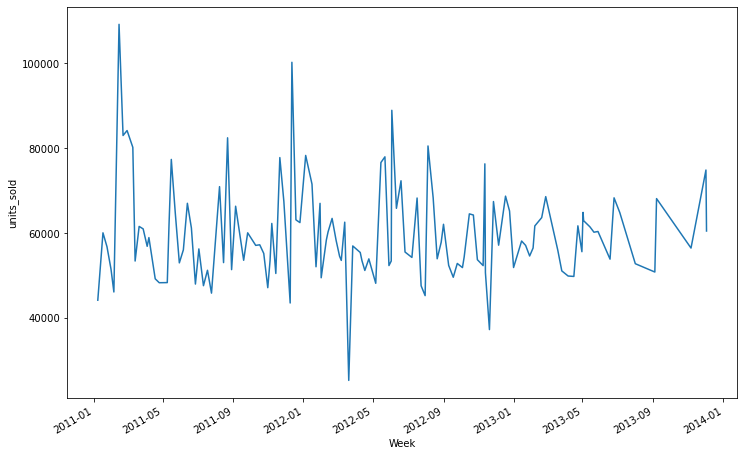

In [16]:
train.groupby('week').sum()['units_sold'].plot(figsize=(12,8))
plt.xlabel('Week')
plt.ylabel('units_sold')

Text(0, 0.5, 'total_price')

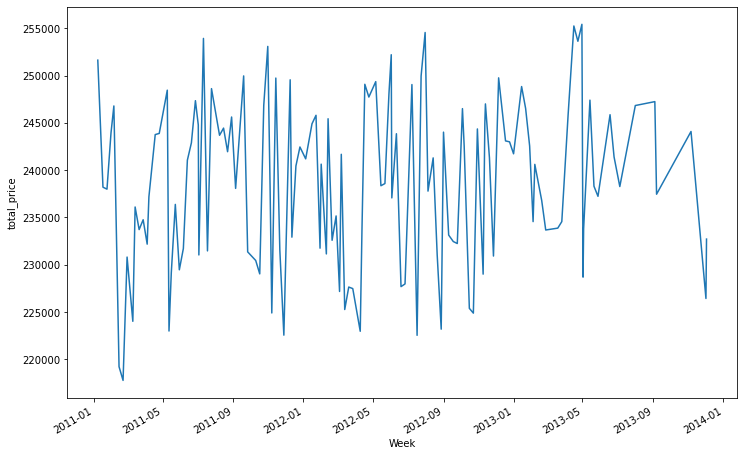

In [17]:
train.groupby('week').sum()['total_price'].plot(figsize=(12,8))
plt.xlabel('Week')
plt.ylabel('total_price')

Text(0, 0.5, 'units_sold')

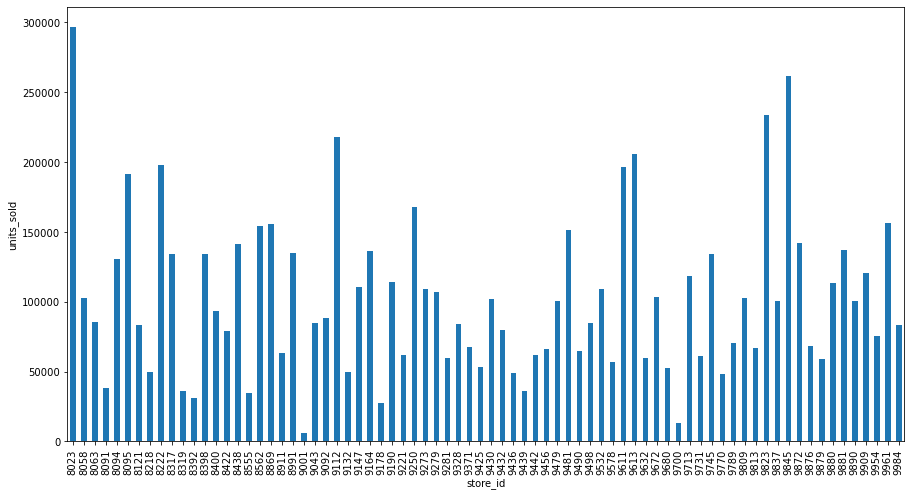

In [18]:
train.groupby('store_id').sum()['units_sold'].plot(figsize=(15,8),kind='bar')
plt.xlabel('store_id')
plt.ylabel('units_sold')

Text(0, 0.5, 'units_sold')

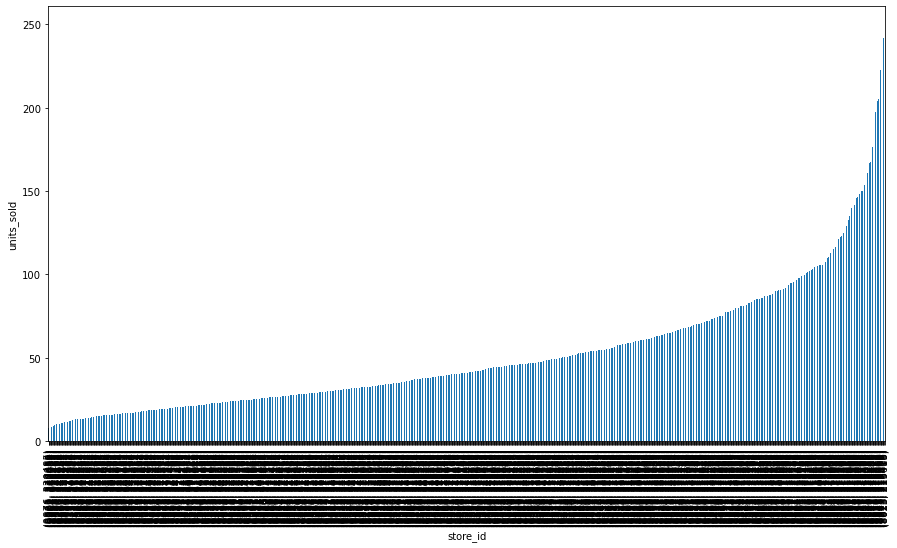

In [19]:
train.groupby(['store_id','sku_id']).mean()['units_sold'].sort_values().plot(figsize=(15,8),kind='bar')

plt.xlabel('store_id')
plt.ylabel('units_sold')

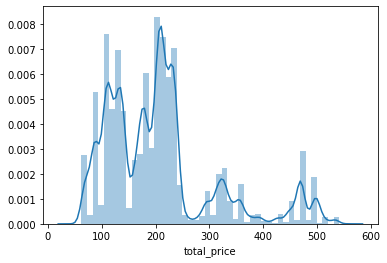

In [20]:
import seaborn as sns
sns.distplot(train['total_price'])

# Handling missing values

In [21]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

One missing value

In [22]:
train[train['total_price'].isna() == True]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,2013-04-23,9436,245338,NaN,469.5375,0,0,1


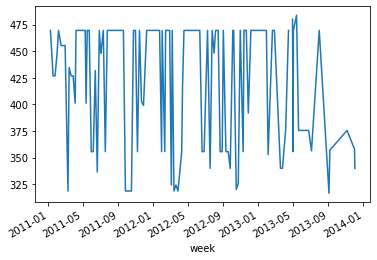

In [23]:
train[(train['store_id']==9436) & (train['sku_id']==245338) ].set_index('week')['total_price'].plot()

In [24]:
train[(train['store_id']==9436) & (train['sku_id']==245338) & (train['week'] >= datetime.datetime.strptime('2013-04-23', '%Y-%M-%d'))]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
119624,169396,2013-08-01,9436,245338,469.5375,469.5375,0,0,7
123089,174299,2013-01-29,9436,245338,469.5375,469.5375,0,0,4
124244,175917,2013-05-02,9436,245338,355.5375,469.5375,0,1,20
125399,177544,2013-12-02,9436,245338,357.6750,469.5375,1,1,67
126554,179175,2013-02-19,9436,245338,469.5375,469.5375,0,0,7
127709,180808,2013-02-26,9436,245338,469.5375,469.5375,0,0,9
128864,182447,2013-05-03,9436,245338,469.5375,469.5375,0,0,4
130019,184085,2013-12-03,9436,245338,339.8625,469.5375,1,0,33
131174,185728,2013-03-19,9436,245338,339.8625,469.5375,1,1,30
132329,187366,2013-03-26,9436,245338,339.8625,469.5375,1,1,16


Interpolating the value

In [25]:
train = train.fillna(475)

In [26]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

# Data preprocessing 

In [40]:
df = train.append(test)

In [28]:
df.shape

(164010, 9)

In [41]:
column=['sku_id','store_id']
name='count_id_sku_store'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

In [42]:
column = ['sku_id']
name='count_id_sku'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

In [43]:
column = ['store_id']
name='count_id_store'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

In [45]:
df['price_diff_percent'] = (df['base_price'] - df['total_price']) / df['base_price']

Week

In [46]:
df['Month'] = pd.to_datetime(df['week']).dt.month

df['Day'] = pd.to_datetime(df['week']).dt.day

df['Dayofweek'] = pd.to_datetime(df['week']).dt.dayofweek

df['DayOfyear'] = pd.to_datetime(df['week']).dt.dayofyear

df['Week'] = pd.to_datetime(df['week']).dt.week

df['Quarter'] = pd.to_datetime(df['week']).dt.quarter 

df['Is_month_start'] = pd.to_datetime(df['week']).dt.is_month_start

df['Is_month_end'] = pd.to_datetime(df['week']).dt.is_month_end

df['Is_quarter_start'] = pd.to_datetime(df['week']).dt.is_quarter_start

df['Is_quarter_end'] = pd.to_datetime(df['week']).dt.is_quarter_end

df['Is_year_start'] = pd.to_datetime(df['week']).dt.is_year_start

df['Is_year_end'] = pd.to_datetime(df['week']).dt.is_year_end

df['Is_weekday'] = np.where(df['week'].isin([0,1,2,3,4]),1,0)

In [47]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,...,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Is_weekday
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,142.0,...,17,3,1,False,False,False,False,False,False,0
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,142.0,...,17,3,1,False,False,False,False,False,False,0
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,142.0,...,17,3,1,False,False,False,False,False,False,0
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,142.0,...,17,3,1,False,False,False,False,False,False,0
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,142.0,...,17,3,1,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,2013-01-10,9984,223245,241.5375,241.5375,0,0,NaN,142.0,...,10,2,1,False,False,False,False,False,False,0
164006,232282,2013-01-10,9984,223153,240.8250,240.8250,0,0,NaN,142.0,...,10,2,1,False,False,False,False,False,False,0
164007,232285,2013-01-10,9984,245338,382.6125,401.8500,1,1,NaN,142.0,...,10,2,1,False,False,False,False,False,False,0
164008,232286,2013-01-10,9984,547934,191.6625,191.6625,0,0,NaN,142.0,...,10,2,1,False,False,False,False,False,False,0


Label encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
df.dtypes

record_ID                      int64
week                  datetime64[ns]
store_id                       int64
sku_id                         int64
total_price                  float64
base_price                   float64
is_featured_sku                int64
is_display_sku                 int64
units_sold                   float64
count_id_sku_store           float64
count_id_sku                 float64
count_id_store               float64
price_diff_percent           float64
Month                          int64
Day                            int64
Dayofweek                      int64
DayOfyear                      int64
Week                           int64
Quarter                        int64
Is_month_start                  bool
Is_month_end                    bool
Is_quarter_start                bool
Is_quarter_end                  bool
Is_year_start                   bool
Is_year_end                     bool
Is_weekday                     int64
dtype: object

In [51]:
df.select_dtypes(exclude=["int","float"]).columns

Index(['week', 'Is_month_start', 'Is_month_end', 'Is_quarter_start',
       'Is_quarter_end', 'Is_year_start', 'Is_year_end'],
      dtype='object')

In [52]:
col=['store_id','sku_id','Is_month_start','Is_month_end','Is_quarter_start','Is_quarter_end','Is_year_start','Is_year_end']

In [53]:
for i in col:
    df = pd.get_dummies(df, columns=[i])

In [54]:
df

,record_ID,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,...,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,1,2011-01-17,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,...,1,0,1,0,1,0,1,1,0,1
1,2,2011-01-17,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,...,1,0,1,0,1,0,1,1,0,1
2,3,2011-01-17,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,...,1,0,1,0,1,0,1,1,0,1
3,4,2011-01-17,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,...,1,0,1,0,1,0,1,1,0,1
4,5,2011-01-17,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,...,1,0,1,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,2013-01-10,241.5375,241.5375,0,0,NaN,142.0,10366.0,2414.0,...,1,0,1,0,1,0,1,1,0,1
164006,232282,2013-01-10,240.8250,240.8250,0,0,NaN,142.0,8236.0,2414.0,...,1,0,1,0,1,0,1,1,0,1
164007,232285,2013-01-10,382.6125,401.8500,1,1,NaN,142.0,9088.0,2414.0,...,1,0,1,0,1,0,1,1,0,1
164008,232286,2013-01-10,191.6625,191.6625,0,0,NaN,142.0,4402.0,2414.0,...,1,0,1,0,1,0,1,1,0,1


In [55]:
df.drop(['record_ID','week'],inplace=True,axis=1)

In [56]:
df.head()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,...,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,0.11465,1,...,1,0,1,0,1,0,1,1,0,1
1,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,0.00000,1,...,1,0,1,0,1,0,1,1,0,1
2,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,0.00000,1,...,1,0,1,0,1,0,1,1,0,1
3,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,0.00000,1,...,1,0,1,0,1,0,1,1,0,1
4,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,0.00000,1,...,1,0,1,0,1,0,1,1,0,1


In [ ]:
import seaborn as sns
sns.distplot(df['total_price'])

In [57]:
df['total_price']=np.log1p(df['total_price'])
df['base_price']=np.log1p(df['base_price'])
df['units_sold'] = np.log1p(df['units_sold'])

In [ ]:
sns.distplot(df['total_price'])

In [58]:
tests = df[df['units_sold'].isna() == True]
trains = df[df['units_sold'].isna() == False]

In [59]:
print(trains.shape,tests.shape)

(150150, 130) (13860, 130)


In [60]:
del tests['units_sold']

In [61]:
trains.corr()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,...,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
total_price,1.000000,0.964818,0.055316,-0.095097,-0.307979,NaN,-2.054021e-01,7.443723e-02,-0.086049,0.004914,...,0.001636,-0.001636,-0.011940,0.011940,0.002686,-0.002686,NaN,0.002686,-0.002686,NaN
base_price,0.964818,1.000000,0.194962,0.005290,-0.223743,NaN,-2.046420e-01,7.424288e-02,0.177274,0.001780,...,0.004799,-0.004799,-0.002761,0.002761,0.003631,-0.003631,NaN,0.003631,-0.003631,NaN
is_featured_sku,0.055316,0.194962,1.000000,0.426243,0.280215,NaN,-1.153827e-02,1.184017e-02,0.546044,0.005281,...,-0.019447,0.019447,0.035232,-0.035232,-0.000148,0.000148,NaN,-0.000148,0.000148,NaN
is_display_sku,-0.095097,0.005290,0.426243,1.000000,0.337428,NaN,-4.968837e-02,2.507404e-02,0.381251,-0.031031,...,0.005378,-0.005378,0.019389,-0.019389,0.006023,-0.006023,NaN,0.006023,-0.006023,NaN
units_sold,-0.307979,-0.223743,0.280215,0.337428,1.000000,NaN,4.102099e-01,1.451099e-01,0.308244,0.023590,...,0.015634,-0.015634,0.021612,-0.021612,0.023150,-0.023150,NaN,0.023150,-0.023150,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Is_quarter_start_True,-0.002686,-0.003631,0.000148,-0.006023,-0.023150,NaN,2.669184e-17,1.069169e-17,-0.003869,-0.131387,...,-0.494152,0.494152,0.017609,-0.017609,-1.000000,1.000000,NaN,-1.000000,1.000000,NaN
Is_quarter_end_False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Is_year_start_False,0.002686,0.003631,-0.000148,0.006023,0.023150,NaN,-2.345555e-17,3.856967e-17,0.003869,0.131387,...,0.494152,-0.494152,-0.017609,0.017609,1.000000,-1.000000,NaN,1.000000,-1.000000,NaN
Is_year_start_True,-0.002686,-0.003631,0.000148,-0.006023,-0.023150,NaN,2.669184e-17,1.069169e-17,-0.003869,-0.131387,...,-0.494152,0.494152,0.017609,-0.017609,-1.000000,1.000000,NaN,-1.000000,1.000000,NaN


In [62]:
X = trains.drop('units_sold',axis = 1)
Y = train['units_sold']

In [64]:
# Perform cross-validation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

In [65]:
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2,random_state=23)

In [67]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [68]:
rf_base = RandomForestRegressor()
rf_base.fit(x_train,y_train)


rf_tuned = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=True, random_state=None,
                      verbose=0, warm_start=False)
rf_tuned.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=600, oob_score=True)

In [70]:
import lightgbm as lgb

In [71]:
model_lgb_base=lgb.LGBMRegressor(objective='regression')
model_lgb_base.fit(x_train,y_train)

model_lgb_tuned=lgb.LGBMRegressor(bagging_fraction=0.8, bagging_frequency=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=30,
              min_child_samples=20, min_child_weight=30, min_data_in_leaf=70,
              min_split_gain=0.0001, n_estimators=200, n_jobs=-1,
              num_leaves=1200, objective=None, random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

model_lgb_tuned.fit(x_train,y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_frequency=4, feature_fraction=0.5,
              max_depth=30, min_child_weight=30, min_data_in_leaf=70,
              min_split_gain=0.0001, n_estimators=200, num_leaves=1200)

In [75]:
def rmlse(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y_true)-np.log1p(y_pred), 2)))

In [76]:
prediction_rfb_valid=rf_base.predict(x_valid)
prediction_rft_valid=rf_tuned.predict(x_valid)
prediction_lgbmb_valid=model_lgb_base.predict(x_valid)
prediction_lgbmt_valid=model_lgb_tuned.predict(x_valid)

rf_base_msle=100*rmlse(y_valid,prediction_rfb_valid)
rf_tuned_msle=100*rmlse(y_valid,prediction_rft_valid)
lgbm_base_msle=100*rmlse(y_valid,prediction_lgbmb_valid)
lgbm_tuned_msle=100*rmlse(y_valid,prediction_lgbmt_valid)

prediction_ensemble_base=(((1-rf_base_msle)*prediction_rfb_valid)+((1-lgbm_base_msle)*prediction_lgbmb_valid))/(2-rf_base_msle-lgbm_base_msle)
prediction_ensemble_tuned=(((1-rf_tuned_msle)*prediction_rft_valid)+((1-lgbm_tuned_msle)*prediction_lgbmt_valid))/(2-rf_tuned_msle-lgbm_tuned_msle)

ensemble_base_msle=100*rmlse(y_valid,prediction_ensemble_base)
ensemble_tuned_msle=100*rmlse(y_valid,prediction_ensemble_tuned)


print("RF Base: {}; RF Tuned: {}".format(rf_base_msle,rf_tuned_msle))
print("LGBM Base: {}; LGBM Tuned: {}".format(lgbm_base_msle,lgbm_tuned_msle))
print("Ensemble Base: {}; Ensemble Tuned: {}".format(ensemble_base_msle,ensemble_tuned_msle))

RF Base: 38.83408604837362; RF Tuned: 42.968182496457615
LGBM Base: 47.66238028137961; LGBM Tuned: 38.58749629968697
Ensemble Base: 41.89220633012873; Ensemble Tuned: 38.235318036975954


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [77]:
model = lgb.LGBMRegressor(bagging_fraction=0.8, bagging_frequency=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=30,
              min_child_samples=20, min_child_weight=30, min_data_in_leaf=70,
              min_split_gain=0.0001, n_estimators=100, n_jobs=-1,
              num_leaves=1400, objective=None, random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

model.fit(X,Y)

LGBMRegressor(bagging_fraction=0.8, bagging_frequency=4, feature_fraction=0.5,
              max_depth=30, min_child_weight=30, min_data_in_leaf=70,
              min_split_gain=0.0001, num_leaves=1400)

In [78]:
prediction=model.predict(tests)

In [79]:
final_prediction=np.round(np.expm1(prediction))
sample['units_sold']=final_prediction


In [83]:
sample['units_sold'] = sample['units_sold'].abs()

In [84]:
sample.to_csv('submissions.csv',index=False,encoding='utf-8')

Model - Another approach

In [85]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

In [90]:
def RMSLE(actual, predicted):

    predicted = np.array([np.log(np.abs(x+1.0)) for x in predicted])  # doing np.abs for handling neg values  
    actual = np.array([np.log(np.abs(x+1.0)) for x in actual])
    log_err = actual-predicted
    
    return 1000*np.sqrt(np.mean(log_err**2))

In [93]:
preds = reg.predict(tests)
#print(f'The validation RMSLE error for baseline model is: {RMSLE(np.exp(x_valid), np.exp(preds))}')

In [94]:
print(preds)

[26.79 29.29 23.76 ... 44.08 10.66  7.98]


In [98]:
final_prediction_rf=np.round((preds))
sample['units_sold']=final_prediction_rf
sample['units_sold']
sample['units_sold'] = sample['units_sold'].abs()
sample.to_csv('submissions_base.csv',index=False,encoding='utf-8')

Rank - 75

In [101]:
Xtrain, Xval, ytrain, yval = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print(Xtrain.shape, ytrain.shape, Xval.shape, yval.shape)

(120120, 129) (120120,) (30030, 129) (30030,)


In [104]:
def runLGB(Xtrain, ytrain, Xval, yval, cat_cols, Xtest = None):
    params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l1',
    #'max_depth': 9, 
    'learning_rate': 0.1
    ,'verbose': 1
    , "min_data_in_leaf" : 10
    }

    n_estimators = 800
    early_stopping_rounds = 10

    d_train = lgb.Dataset(Xtrain.copy(), label=ytrain.copy(), categorical_feature=cat_cols)
    d_valid = lgb.Dataset(Xval.copy(), label=yval.copy(), categorical_feature=cat_cols)
    watchlist = [d_train, d_valid]
    model = lgb.train(params, d_train, n_estimators
                      , valid_sets = [d_train, d_valid]
                      , verbose_eval=n_estimators
                      , early_stopping_rounds=early_stopping_rounds)

    preds = model.predict(Xval, num_iteration=model.best_iteration)
    err = RMSLE(yval, np.exp(preds))
    
    preds_test = model.predict(Xtest, num_iteration=model.best_iteration)
    return  preds, err, np.exp(preds_test), model

In [105]:
pred_val, err, pred_test,model = runLGB(Xtrain, ytrain, Xval, yval, list(X.select_dtypes(exclude=["int","float"]).columns), tests)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 10 rounds
[800]	training's l1: 10.9928	valid_1's l1: 12.641
Did not meet early stopping. Best iteration is:
[800]	training's l1: 10.9928	valid_1's l1: 12.641


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp


In [108]:

final_prediction=np.round(np.expm1(pred_test))
sample['units_sold'] = final_prediction
sample.to_csv('lgb_v1.csv', index = False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.
